# Penguins dataset - EDA

In [1]:
# Penguins EDA - same Titanic steps (with comments)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# 1. Load dataset
df = sns.load_dataset('penguins')   # seaborn built-in
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:

# 2. Basic Information & Overview
print("Shape of Dataset : ", df.shape)
print("\nData Info :")
print(df.info())


Shape of Dataset :  (344, 7)

Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [4]:

# 3. Summary Statistics
display(df.describe(include='all'))


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:

# 4. Missing values Analysis
missing = pd.DataFrame({
    'missing_count' : df.isnull().sum(),
    'missing_percent' : (df.isnull().sum()/len(df))*100
}).sort_values(by='missing_percent', ascending=False)
print(missing)


                   missing_count  missing_percent
sex                           11         3.197674
bill_length_mm                 2         0.581395
bill_depth_mm                  2         0.581395
flipper_length_mm              2         0.581395
body_mass_g                    2         0.581395
species                        0         0.000000
island                         0         0.000000


In [6]:

# 4a. Handling missing values
# Numeric: fill with median (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g)
for c in ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']:
    if c in df.columns and df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].median())

# Categorical: fill with mode (species, island, sex)
for c in ['species','island','sex']:
    if c in df.columns and df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].mode()[0])

print('Missing values after cleaning :', df.isnull().sum().sum())


Missing values after cleaning : 0


In [7]:

# Duplication & Data type check
print("Duplicate Rows : ", df.duplicated().sum())
for c in ['species','island','sex']:
    if c in df.columns:
        df[c] = df[c].astype('category')
df.info()


Duplicate Rows :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     344 non-null    float64 
 3   bill_depth_mm      344 non-null    float64 
 4   flipper_length_mm  344 non-null    float64 
 5   body_mass_g        344 non-null    float64 
 6   sex                344 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


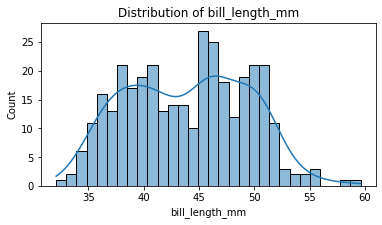

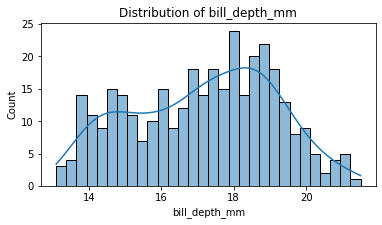

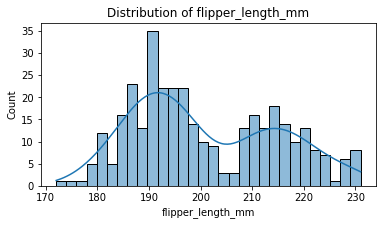

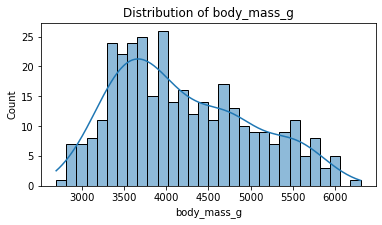

In [8]:

# Univariate Analysis - Numerical Features
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
display(df[num_cols].describe())

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


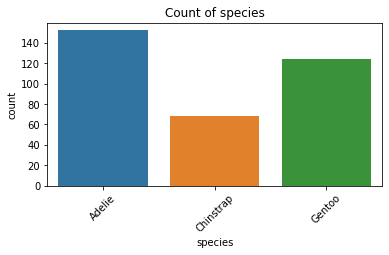

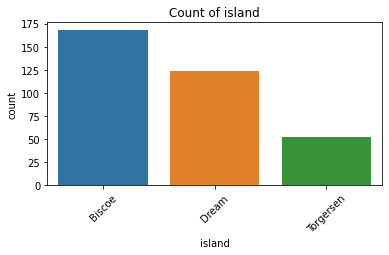

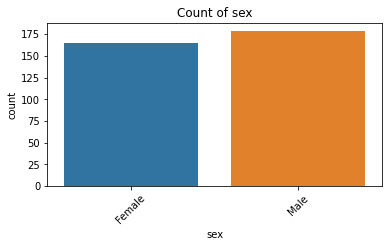

In [9]:

# Univariate Analysis - Categorical Features
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


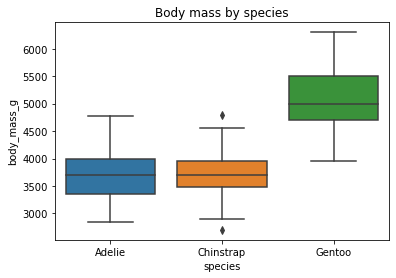

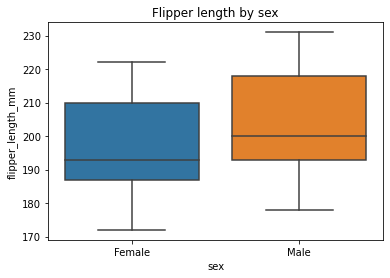

In [10]:

# Bivariate Analysis - Numerical vs Categorical
if set(['species','body_mass_g']).issubset(df.columns):
    sns.boxplot(x='species', y='body_mass_g', data=df)
    plt.title("Body mass by species")
    plt.show()

if set(['sex','flipper_length_mm']).issubset(df.columns):
    sns.boxplot(x='sex', y='flipper_length_mm', data=df)
    plt.title("Flipper length by sex")
    plt.show()


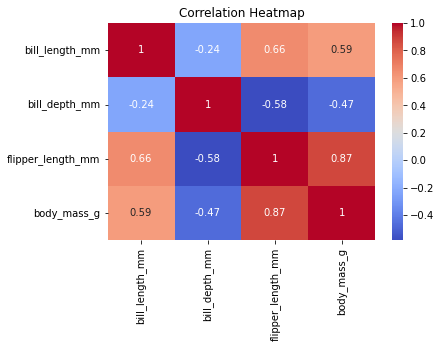

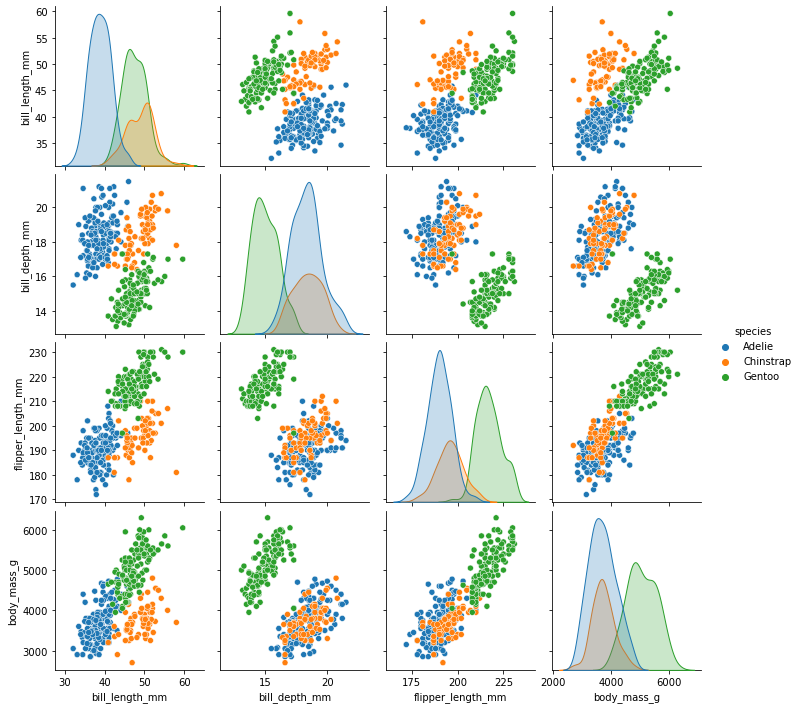

In [11]:

# Correlation and multivariate analysis
corr_cols = [c for c in ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'] if c in df.columns]
if len(corr_cols) >= 2:
    corr = df[corr_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
    sns.pairplot(df[corr_cols + (['species'] if 'species' in df.columns else [])], hue='species' if 'species' in df.columns else None)
    plt.show()


Number of outliers in body_mass_g :  0


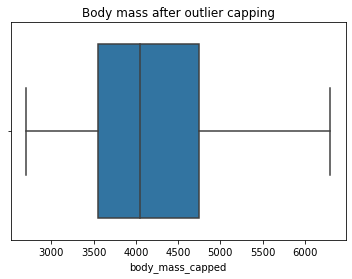

In [12]:

# Outlier detection using IQR on 'body_mass_g'
if 'body_mass_g' in df.columns:
    Q1 = df['body_mass_g'].quantile(0.25)
    Q3 = df['body_mass_g'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['body_mass_g'] < lower) | (df['body_mass_g'] > upper)]
    print("Number of outliers in body_mass_g : ",len(outliers))
    df['body_mass_capped'] = df['body_mass_g'].clip(lower, upper)
    sns.boxplot(x=df['body_mass_capped'])
    plt.title("Body mass after outlier capping")
    plt.show()


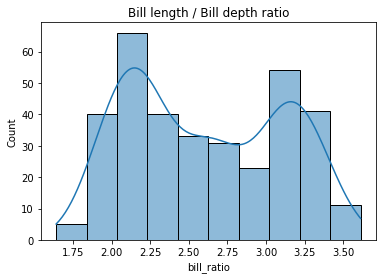

In [14]:

# Feature Engineering
# Example: bill_ratio = bill_length_mm / bill_depth_mm
if set(['bill_length_mm','bill_depth_mm']).issubset(df.columns):
    df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm'].replace(0, np.nan)
    df['bill_ratio'] = df['bill_ratio'].fillna(df['bill_ratio'].median())
    sns.histplot(df['bill_ratio'], kde=True)
    plt.title("Bill length / Bill depth ratio")
    plt.show()


In [15]:
#Export the Cleaned data
df.to_csv("penguins_cleaned.csv", index=False)
print("\n Cleaned penguins data saved as penguins_cleaned.csv")



 Cleaned penguins data saved as penguins_cleaned.csv
